In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import missingno as mno

In [24]:
df = pd.read_csv('CSV_train.csv', sep=';')

In [25]:
df.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

Log Name                                            Log Description
FORCE_2020_LITHOFACIES_CONFIDENCE                   Qualitiative measure of interpretation confidence FORCE_2020_LITHOFACIES LITHOLOGY Interpreted Lithofacies
RDEP                                                Deep Reading Restitivity measurement
RSHA                                                Shallow Reading Restitivity measurement
RMED                                                Medium Deep Reading Restitivity measurement
RXO                                                 Flushed Zone Resistivity measurment
RMIC                                                Micro Resisitivity measurment
SP                                                  Self Potential Log
DTS                                                 Shear wave sonic log (us/ft)
DTC                                                 Compressional waves sonic log (us(ft))
NPHI                                                Neutron Porosity log
PEF                                                 Photo Electric Factor log
GR                                                  Gramma Ray Log
RHOB                                                Bulk Density Log
DRHO                                                Density Correction log
CALI                                                Caliper log
BS                                                  Borehole Size
DCAL                                                Differential Caliper log
ROPA SGR                                            Average Rate of Penetration    
MUDWEIGHT                                           Spectra Gamma Ray log    
ROP                                                 Wheight of Drilling Mud
DEPTH_MD                                            Rate of Penetration Measured Depth    
x_loc                                               X location of sample
y_loc                                               Y location of sample
z_loc                                               Z (TVDSS) Depth of sample

In [27]:
df["FORCE_2020_LITHOFACIES_LITHOLOGY"].nunique()

12

In [28]:
df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000], dtype=int64)

30000: Sandstone

65030: Sandstone/Shale

65000: Shale

80000: Marl

74000: Dolomite

70000: Limestone

70032: Chalk

88000: Halite

86000: Anhydrite

90000: Coal

93000: Basement

99000: Tuff

In [29]:
#df = df[['WELL', 'DEPTH_MD', 'GROUP', 'FORMATION', 'CALI', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'FORCE_2020_LITHOFACIES_LITHOLOGY']]
df = df[['WELL', 'DEPTH_MD', 'RDEP', 'RHOB', 'GR', 'DTC', 'FORCE_2020_LITHOFACIES_LITHOLOGY']]
df = df.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LITH'})

<Axes: >

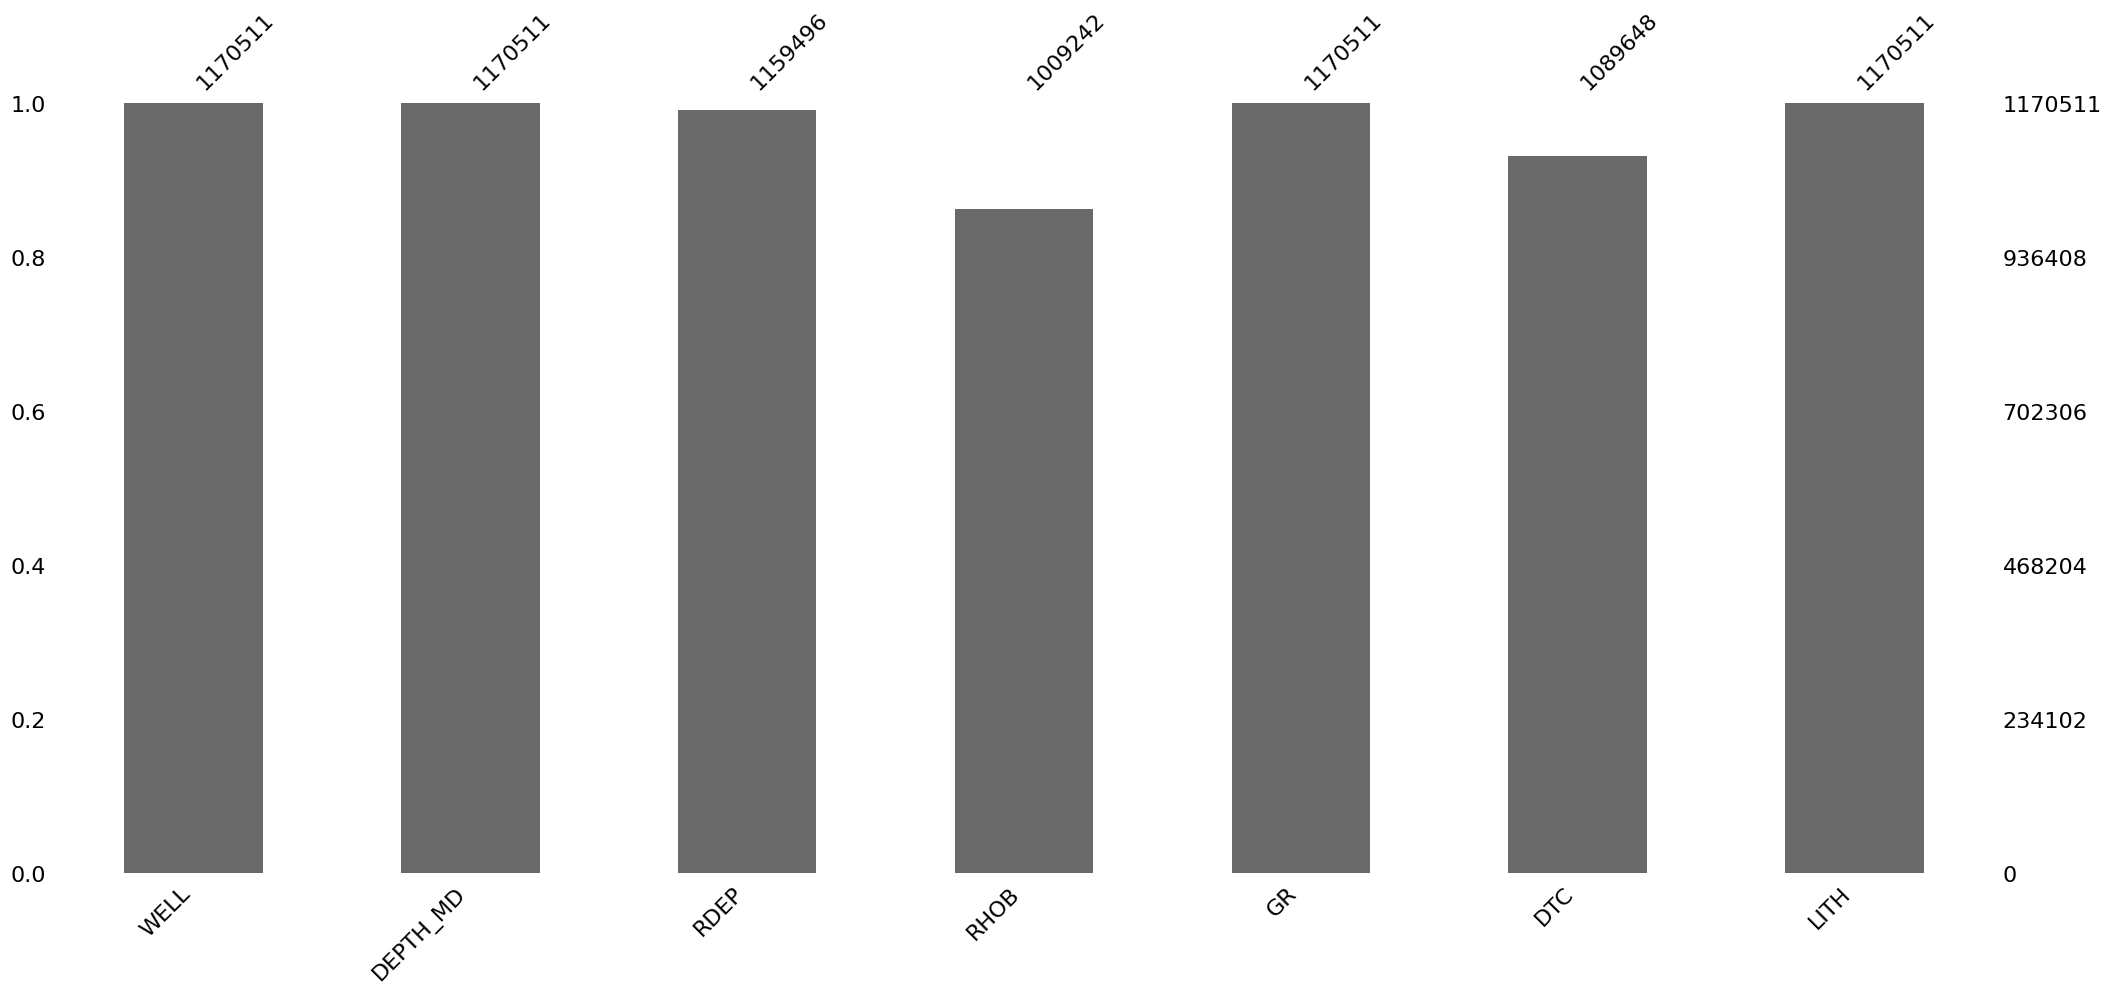

In [30]:
mno.bar(df)

In [31]:
df.dropna(inplace=True)

<Axes: >

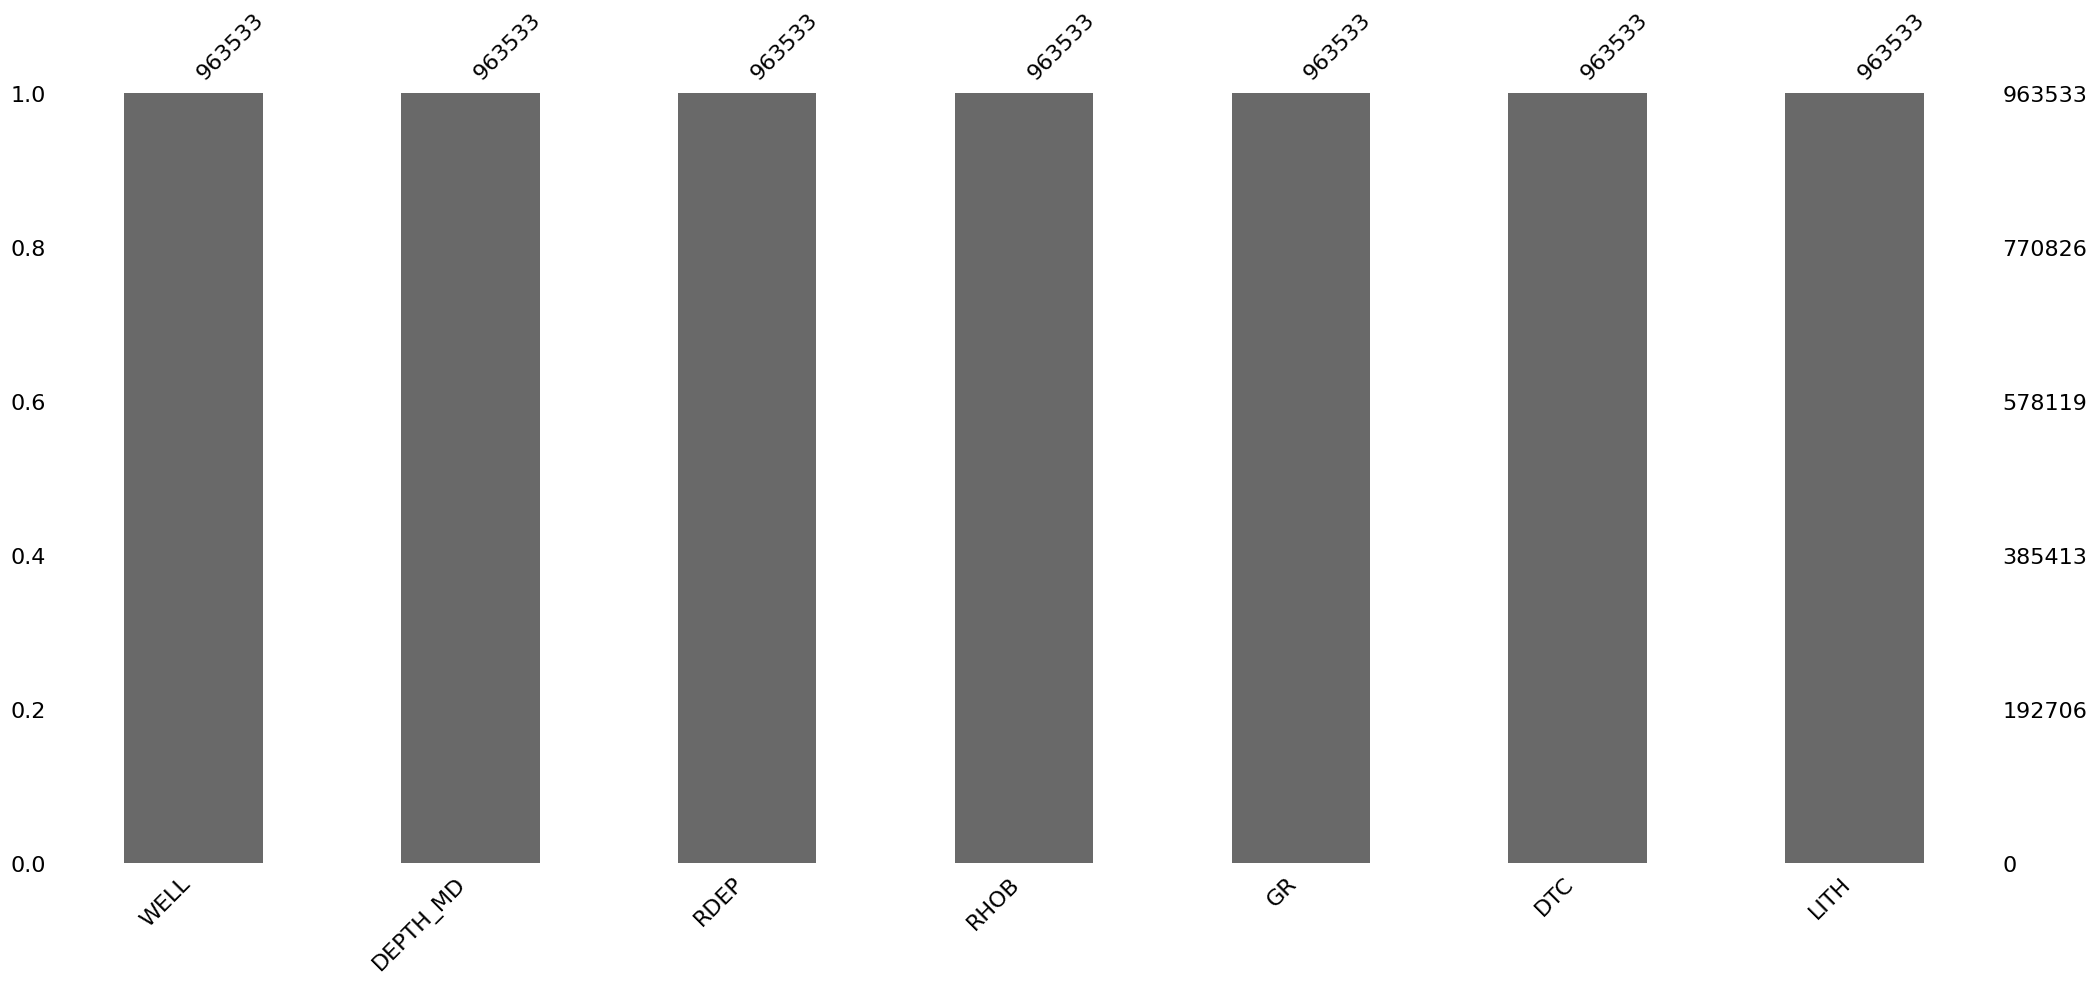

In [32]:
mno.bar(df)

In [33]:
df['LITH'].value_counts()

LITH
65000    578912
30000    145298
65030    124713
70000     52354
80000     31423
99000     13602
70032      7347
88000      3919
90000      3626
74000      1460
86000       786
93000        93
Name: count, dtype: int64

In [35]:
# inputs and target
#X = df[['RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC']]
X = df[['RDEP', 'RHOB', 'GR', 'DTC']]
y = df['LITH']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

data split 7/3

In [37]:
rf = RandomForestClassifier()

In [38]:
rf.fit(X_train, y_train)


RandomForestClassifier()

In [39]:
y_pred = rf.predict(X_test)

In [40]:
accuracy_score(y_test, y_pred)

0.7985400954819069

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       30000       0.75      0.75      0.75     43708
       65000       0.84      0.94      0.89    173493
       65030       0.62      0.49      0.55     37181
       70000       0.75      0.57      0.65     15866
       70032       0.77      0.64      0.70      2227
       74000       0.66      0.11      0.19       432
       80000       0.62      0.36      0.45      9568
       86000       0.90      0.83      0.87       237
       88000       0.98      0.99      0.98      1149
       90000       0.79      0.51      0.62      1072
       93000       0.96      0.79      0.86        28
       99000       0.66      0.31      0.42      4099

    accuracy                           0.80    289060
   macro avg       0.78      0.61      0.66    289060
weighted avg       0.79      0.80      0.79    289060



In [43]:
cf_matrix = confusion_matrix(y_test, y_pred)

Text(108.2222222222222, 0.5, 'Actual Values ')

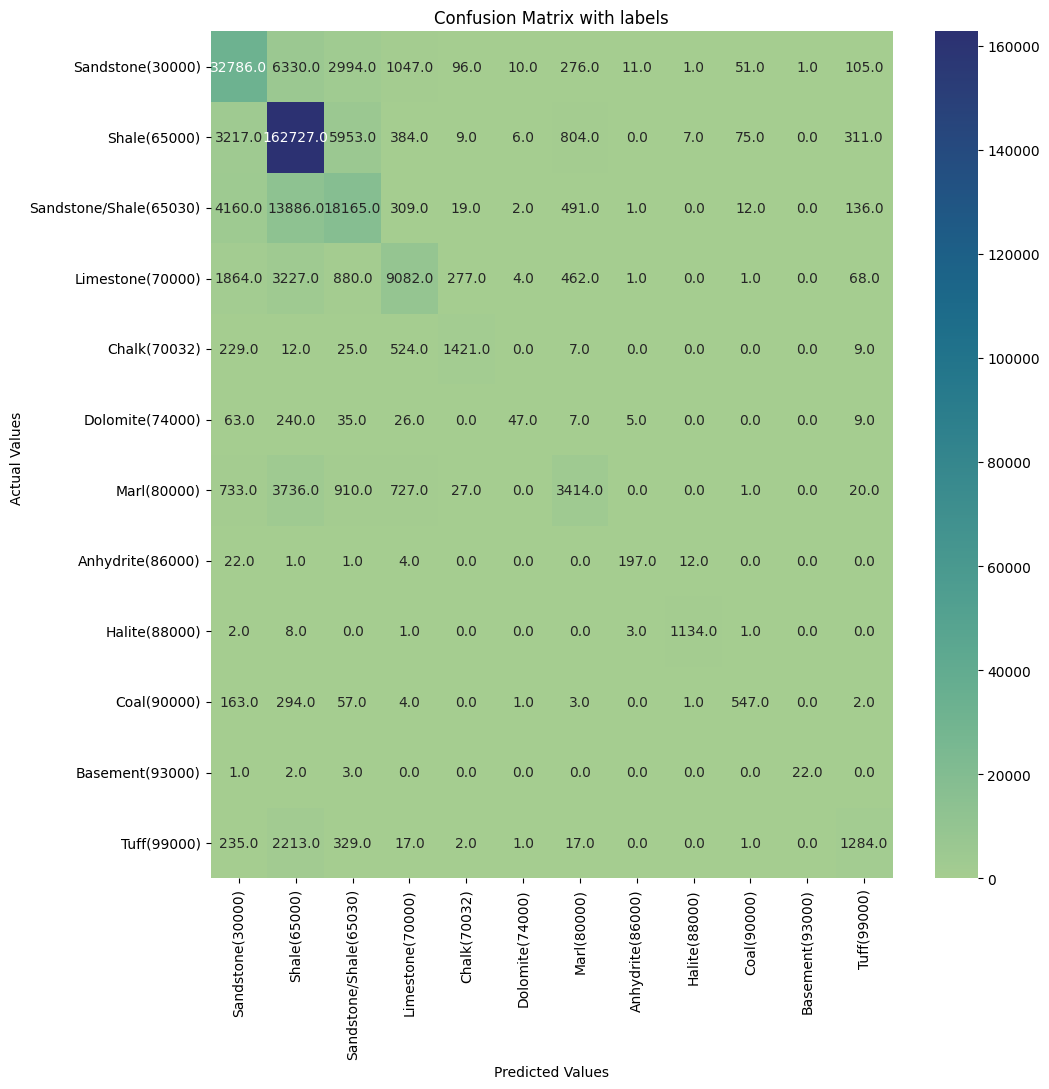

In [50]:
#old labels = ['Shale(65000)', 'Sandstone(30000)',  'Sandstone/Shale(65030)', 'Limestone(70000)', 'Marl(80000)', 'Tuff(99000)', 
#               'Chalk(70032)', 'Coal(90000)', 'Dolomite(74000)','Anhydrite(86000)', 'Halite(88000)']

labels = ['Sandstone(30000)', 'Shale(65000)', 'Sandstone/Shale(65030)', 'Limestone(70000)', 'Chalk(70032)', 'Dolomite(74000)', 
            'Marl(80000)', 'Anhydrite(86000)', 'Halite(88000)','Coal(90000)', 'Basement(93000)', 'Tuff(99000)']
            
fig = plt.figure(figsize=(11,11))
ax = sns.heatmap(cf_matrix, annot=True, cmap='crest', fmt='.1f', xticklabels=labels, yticklabels = labels)
ax.set_title('Confusion Matrix with labels')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')